# Importing Required Libraries For EDA and Data Cleaning

In [2]:
# Basic libraries to import Datasets and do operations on them 
import pandas as pd 
import numpy as np

# Datasets with many columns will get truncated so we need the below code 
pd.set_option('display.max_columns', None)

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# For Visualizations and Analysis
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset as Pandas Dataframe

In [3]:
df=pd.read_csv("survey.csv")
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
df.shape

(1259, 27)

In [5]:
# Dropping the Timestamp column since its not that useful for analysis
df.drop("Timestamp",axis=1,inplace=True)
df.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


# Handling missing values and data column by column

In [6]:
df["Age"].describe()

count    1.259000e+03
mean     7.942815e+07
std      2.818299e+09
min     -1.726000e+03
25%      2.700000e+01
50%      3.100000e+01
75%      3.600000e+01
max      1.000000e+11
Name: Age, dtype: float64

In [7]:
print("No. of Null Values :",df["Age"].isnull().sum())

No. of Null Values : 0


We can see that the Age column doesn't have any missing values but contains outliers that can be either filtered out or can be replaced by some value.

In [8]:
# Considering greater than 80 would be consiered as outlier
print((df[(df["Age"]>10) & (df["Age"]<81)].shape)[0])

1252


With seven outliers in the actual dataset, filtering out the rows that contain them seems like a better course of action

In [9]:
# Filtering Outliers in Age column
clean_df=df[(df["Age"]>10) & (df["Age"]<81)]
clean_df.describe()

,Age
count,1252.000000
mean,32.059904
std,7.309669
min,11.000000
25%,27.000000
50%,31.000000
75%,36.000000
max,72.000000


In [10]:
print("No. Of Missing Values :",clean_df["Gender"].isnull().sum())
print("Unique terms :",clean_df["Gender"].unique())

No. Of Missing Values : 0
Unique terms : ['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'Malr' 'femail' 'Cis Man'
 'ostensibly male, unsure what that really means']


Many spelling mistakes; similar genders can be spotted, many categories in gender too that can make encoding difficult

In [11]:
# So defining a custom function to categorise genders into male , female , others
def gen_cat(gender):
    g=gender.strip().lower()
    if 't'in g or gender =='fluid':
        return "Other"
    elif 'f' in g:
        return "Female"
    elif 'm' in g or 'g' in g:
        return "Male"
    else :
        return "Other"

In [12]:
clean_df['Gender']=clean_df['Gender'].apply(gen_cat)
clean_df.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,44,Male,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [13]:
# Collective checking of presence of any Missing values
print("Country")
print("No. of Missing Terms :",clean_df["Country"].isnull().sum())
print("Unique Terms :",clean_df["Country"].unique())
print("family_history")
print("No. Of Missing Terms",clean_df["family_history"].isnull().sum())
print("Unique Terms :",clean_df["family_history"].unique())
print("treatment")
print("No. Of Missing Terms",clean_df["treatment"].isnull().sum())
print("Unique Terms :",clean_df["treatment"].unique())
print("remote_work")
print("No. Of Missing Terms :",clean_df["remote_work"].isnull().sum())
print("Unique Terms :",clean_df["remote_work"].unique())
print("tech_company")
print("No. Of Missing Terms :",clean_df["tech_company"].isnull().sum())
print("Unique Terms :",clean_df["tech_company"].unique())
print("benfits")
print("No. Of Missing Terms :",clean_df["benefits"].isnull().sum())
print("Unique Terms :",clean_df["benefits"].unique())
print("care_options")
print("No. Of Missing Terms :",clean_df["care_options"].isnull().sum())
print("Unique Terms :",clean_df["care_options"].unique())
print("wellnes_program")
print("No. Of Missing Terms :",clean_df["wellness_program"].isnull().sum())
print("Unique Terms :",clean_df["wellness_program"].unique())
print("seek_help")
print("No. Of Missing Terms :",clean_df["seek_help"].isnull().sum())
print("Unique Terms :",clean_df["seek_help"].unique())
print("ananymity")
print("No. Of Missing Terms :",clean_df["anonymity"].isnull().sum())
print("Unique Terms :",clean_df["anonymity"].unique())
print("leave")
print("No. Of Missing Terms :",clean_df["leave"].isnull().sum())
print("Unique Terms :",clean_df["leave"].unique())
print("mental_health_consequence")
print("No. Of Missing Terms :",clean_df["mental_health_consequence"].isnull().sum())
print("Unique Terms :",clean_df["mental_health_consequence"].unique())
print("coworkers")
print("No. Of Missing Terms :",clean_df["coworkers"].isnull().sum())
print("Unique Terms :",clean_df["coworkers"].unique())
print("supervisor")
print("No. Of Missing Terms :",clean_df["supervisor"].isnull().sum())
print("Unique Terms :",clean_df["supervisor"].unique())
print("mental_health_interview")
print("No. Of Missing Terms :",clean_df["mental_health_interview"].isnull().sum())
print("Unique Terms :",clean_df["mental_health_interview"].unique())
print("phys_health_interview")
print("No. Of Missing Terms :",clean_df["phys_health_interview"].isnull().sum())
print("Unique Terms :",clean_df["phys_health_interview"].unique())
print("mental_vs_physical")
print("No. Of Missing Terms :",clean_df["mental_vs_physical"].isnull().sum())
print("Unique Terms :",clean_df["mental_vs_physical"].unique())
print("obs_consequences")
print("No. Of Missing Terms :",clean_df["obs_consequence"].isnull().sum())
print("Unique Terms :",clean_df["obs_consequence"].unique())

Country
No. of Missing Terms : 0
Unique Terms : ['United States' 'Canada' 'United Kingdom' 'Bulgaria' 'France' 'Portugal'
 'Netherlands' 'Switzerland' 'Poland' 'Australia' 'Germany' 'Russia'
 'Mexico' 'Brazil' 'Slovenia' 'Costa Rica' 'Austria' 'Ireland' 'India'
 'South Africa' 'Italy' 'Sweden' 'Colombia' 'Latvia' 'Romania' 'Belgium'
 'New Zealand' 'Spain' 'Finland' 'Uruguay' 'Israel'
 'Bosnia and Herzegovina' 'Hungary' 'Singapore' 'Japan' 'Nigeria'
 'Croatia' 'Norway' 'Thailand' 'Denmark' 'Greece' 'Moldova' 'Georgia'
 'China' 'Czech Republic' 'Philippines']
family_history
No. Of Missing Terms 0
Unique Terms : ['No' 'Yes']
treatment
No. Of Missing Terms 0
Unique Terms : ['Yes' 'No']
remote_work
No. Of Missing Terms : 0
Unique Terms : ['No' 'Yes']
tech_company
No. Of Missing Terms : 0
Unique Terms : ['Yes' 'No']
benfits
No. Of Missing Terms : 0
Unique Terms : ['Yes' "Don't know" 'No']
care_options
No. Of Missing Terms : 0
Unique Terms : ['Not sure' 'No' 'Yes']
wellnes_program
No. Of Miss

### All columns do not include any missing value or unusual entry

### I'm dropping the state column since it doesn't hold that much in my vision. 

In [14]:
clean_df.drop('state',axis=1,inplace=True)
#Dropping the comments since it contains text (It can be used for NLP tasks)
clean_df.drop('comments',axis=1,inplace=True)
clean_df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,United States,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [15]:
print("No. of Missing Terms",clean_df["self_employed"].isnull().sum())
print("Unique Terms :",clean_df["self_employed"].unique())

No. of Missing Terms 18
Unique Terms : [nan 'Yes' 'No']


In [16]:
clean_df["self_employed"].value_counts()

self_employed
No     1091
Yes     143
Name: count, dtype: int64

The self-employed column consists some Null values that can be replaced by No since the number of No's are much more than the number of Yes's.

In [17]:
clean_df["self_employed"].fillna("No",inplace=True)

Columns: family_history, treatment have no missing values

In [18]:
clean_df["work_interfere"].isnull().sum()

np.int64(262)

In [19]:
clean_df["work_interfere"].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

Contains missing values but no unusual entry

In [20]:
clean_df["work_interfere"].value_counts()

work_interfere
Sometimes    464
Never        213
Rarely       173
Often        140
Name: count, dtype: int64

In [21]:
# Imputing most occured entry 
clean_df["work_interfere"].fillna("Sometimes",inplace=True)
clean_df["work_interfere"].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes'], dtype=object)

In [22]:
clean_df["no_employees"].isnull().sum()

np.int64(0)

In [23]:
clean_df["no_employees"].unique()

array(['6-25', 'More than 1000', '26-100', '100-500', '1-5', '500-1000'],
      dtype=object)

No missing values are there, but still the raw data isnt ready to be used and requires modification

In [24]:
# To use this data for further EDA and Model training I would consider the upper limit of given ranges and for more than 1000 would consider 1000 only
# For this we need to split the string about '-' and ' '
# For this we would import a library 

import re

clean_df["no_employees"]=clean_df["no_employees"].apply(lambda x: re.split(r'[ -]', str(x))[-1]).astype(int)

In [25]:
clean_df.isnull().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

## Now the Data has been cleaned, and now it's ready for EDA (Exploratory Data Analysis)

In [26]:
# saving the cleaned data to a new csv file
clean_df.to_csv("cleaned_survey.csv",index=False)

# **Exploratory Data Analysis (EDA)**

In [27]:
clean_df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,No,No,Yes,Often,25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,United States,No,No,No,Rarely,1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,No,No,No,Rarely,25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,No,Yes,Yes,Often,100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,No,No,No,Never,500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


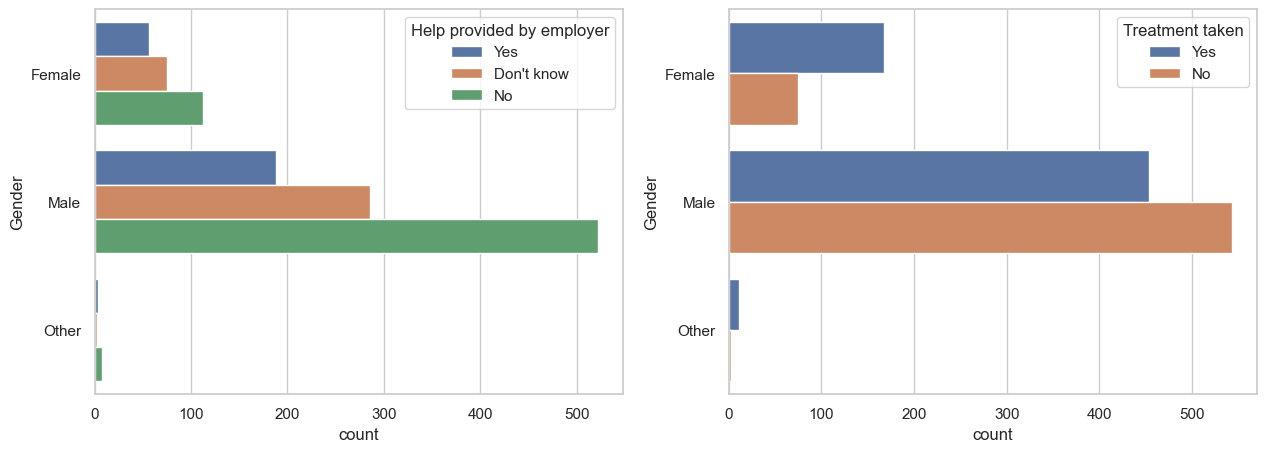

In [28]:
plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")
plt.subplot(1,2,1)
sns.countplot(data=clean_df,y="Gender",hue="seek_help")
plt.legend(title="Help provided by employer")
plt.subplot(1,2,2)
sns.countplot(data=clean_df,y="Gender",hue="treatment")
plt.legend(title="Treatment taken")
plt.show()

## Insights:
* Most employers don't provide any assistance concerning the mental health of their employees.
* Even if the employers are providing any assistance, employees themselves are not aware of it.
* This indicates that awareness is lacking in many organisations, and the disconnect between employees and employers leads to poor mental health, as employees often end up receiving no support.
* Females and other gender employees care about their mental health and sought treatment for mental health.
*  Many male employees do not seek help for their mental well-being.   

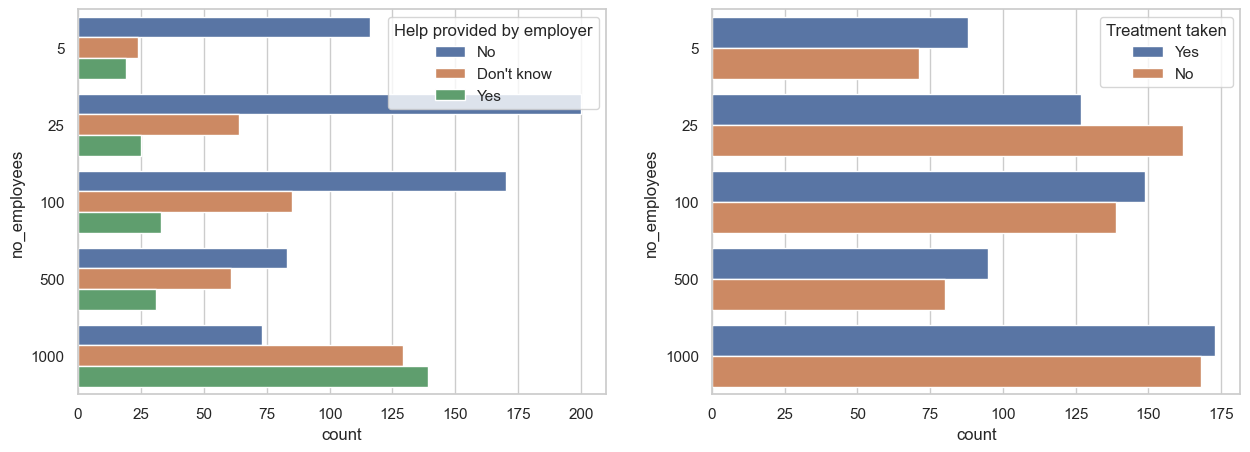

In [29]:
plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")
plt.subplot(1,2,1)
sns.countplot(data=clean_df,y="no_employees",hue="seek_help")
plt.legend(title="Help provided by employer")
plt.subplot(1,2,2)
sns.countplot(data=clean_df,y="no_employees",hue="treatment")
plt.legend(title="Treatment taken")
plt.show()

## Insights:
* Organisations with a lower number of employees do not provide that much help regarding mental health due to the lower number of employees and lack of manpower.
* Organisations with a higher number of employees (more than 500) provide help and resources regarding their employees' mental health, but most of the employees aren't aware of those resources.
* The proportion of employees getting treatment is closely the same; no such pattern is visible with respect to the number of employees.

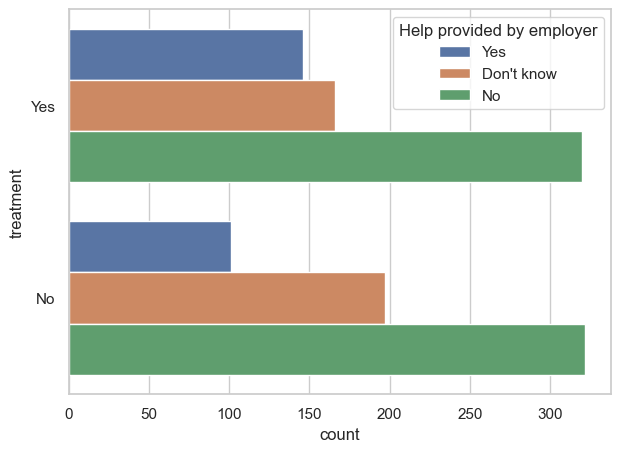

In [30]:
plt.figure(figsize=(7,5))
sns.set_theme(style="whitegrid")
sns.countplot(data=clean_df,y="treatment",hue="seek_help")
plt.legend(title="Help provided by employer")
plt.show()

## Insights:
* People who got treatment regarding their mental health actually did it without any assistance provided by their organisation.
* Even if the organisation provides the assistance, they are not taking treatments. That means:
   - They are uncomfortable sharing their mental conditions with their employer.
   - Or, they feels that they are mentally fit and don't need any treatment
* People do care about their mental health and are aware of consequences if there mental health isnt treated

In [31]:
clean_df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,No,No,Yes,Often,25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,United States,No,No,No,Rarely,1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,No,No,No,Rarely,25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,No,Yes,Yes,Often,100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,No,No,No,Never,500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


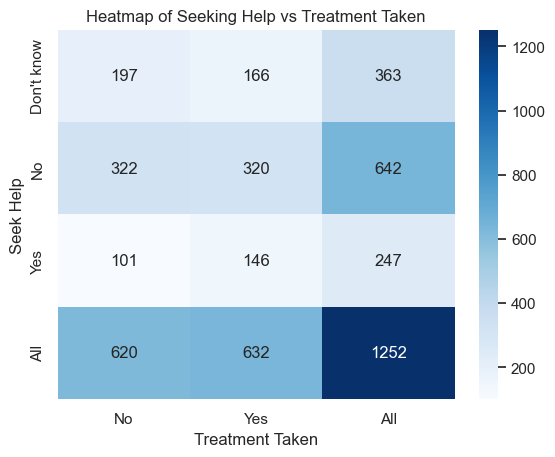

In [32]:
# Realtionship between seeking help and treatment taken 
sns.heatmap(pd.crosstab(clean_df["seek_help"], clean_df["treatment"], margins=True), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Treatment Taken")
plt.ylabel("Seek Help")
plt.title("Heatmap of Seeking Help vs Treatment Taken")
plt.show()

### We can observe some numerical relationship between treatment and seek_help from this cross table:
* No. of employees taken treatment and one who didn't taken treatment are very close irrespective of any help provided by organization in which they work.
* Even if the organization is providing assistance regarding mental health , employees still didnt seek to get treatment for their mental health.

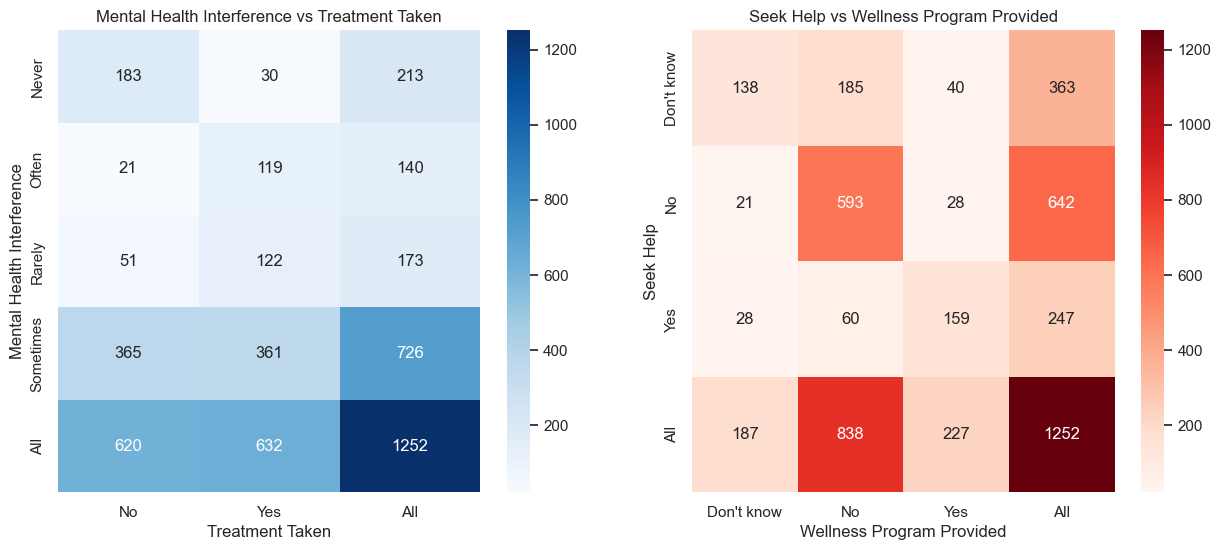

In [33]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.heatmap(pd.crosstab(clean_df["work_interfere"], clean_df["treatment"], margins=True), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Treatment Taken")
plt.ylabel("Mental Health Interference")
plt.title("Mental Health Interference vs Treatment Taken")
plt.subplot(1,2,2)
sns.heatmap(pd.crosstab(clean_df["seek_help"], clean_df["wellness_program"], margins=True), annot=True, fmt='d', cmap='Reds')
plt.ylabel("Seek Help")
plt.xlabel("Wellness Program Provided")
plt.title("Seek Help vs Wellness Program Provided")
plt.show()

## Insights:
* Many employers doesn't include mental health under employees wellness program i.e. they don't provide any help reagrding mental health.
* People consider Mental Health not interfering their work and doesn't seek treatment for for their mental health.
* Employers who provide wellness programs for mental health had informed their employees about their wellness programs and they seek to help their employees.
* Believe of most employees and employers is that the mental health interferes with their work. 

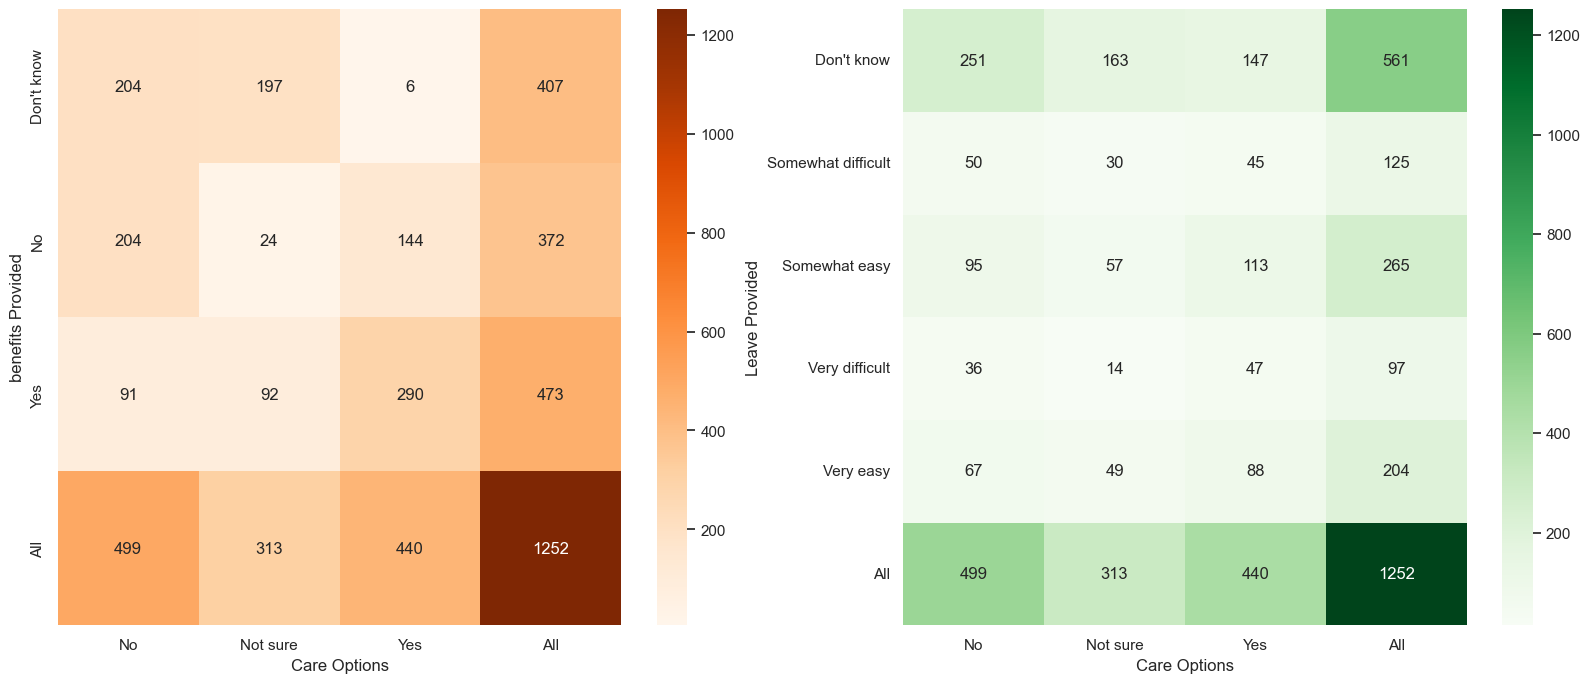

In [34]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.heatmap(pd.crosstab(clean_df["benefits"], clean_df["care_options"], margins=True), annot=True, fmt='d', cmap='Oranges')
plt.xlabel("Care Options")
plt.ylabel("benefits Provided")
plt.subplot(1,2,2)
sns.heatmap(pd.crosstab(clean_df["leave"], clean_df["care_options"], margins=True), annot=True, fmt='d', cmap='Greens')
plt.xlabel("Care Options")
plt.ylabel("Leave Provided")
plt.show()

## Insights:
* Organisations are providing health benefits nut employees are unaware of these benfits.
* Same case for care options , employees are not aware of these benefits and its the responsibility of organization that employees must be aware about these things.
* It is obsereved that the organisation providing care options tend to provide leaves more easily.

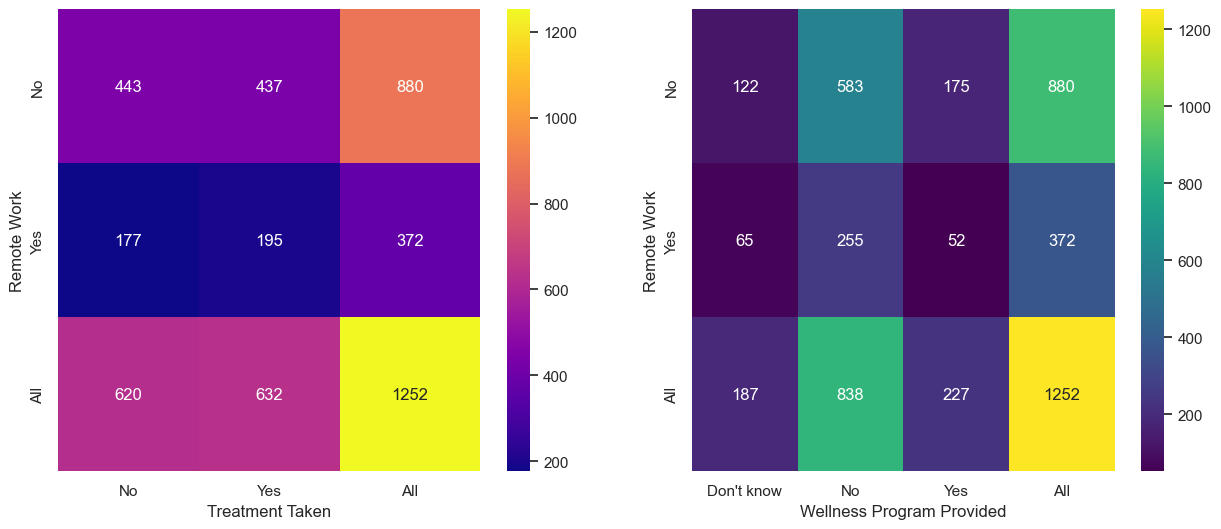

In [35]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.heatmap(pd.crosstab(clean_df["remote_work"], clean_df["treatment"], margins=True), annot=True, fmt='d', cmap='plasma')
plt.xlabel("Treatment Taken")
plt.ylabel("Remote Work")
plt.subplot(1,2,2)
sns.heatmap(pd.crosstab(clean_df["remote_work"], clean_df["wellness_program"], margins=True), annot=True, fmt='d', cmap='viridis')
plt.ylabel("Remote Work")
plt.xlabel("Wellness Program Provided")
plt.show()

## Insights:
* Remote workers either do not know or has no mental wellness program provided by their association.
* Even non remote workers are rarely provided with any mental wellness support .

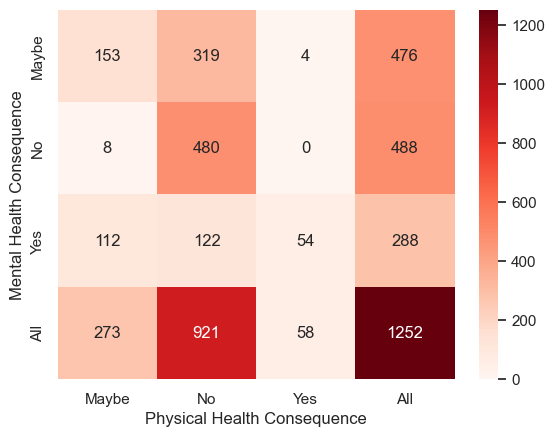

In [36]:
sns.heatmap(pd.crosstab(clean_df["mental_health_consequence"], clean_df["phys_health_consequence"], margins=True), annot=True, fmt='d', cmap='Reds')
plt.xlabel("Physical Health Consequence")
plt.ylabel("Mental Health Consequence")
plt.show()

## Insights:
* Strong association between percieved mental health and physical health consequences.
* One who believes that mental health effect their work believes same for physical health too.
* Employees strongly believe that mental health has no effect or less on their work, suggesting that employees are unaware about consequences on mental health and priortize physical well being.

Text(0.5, 1.0, 'Family History vs Treatment Taken')

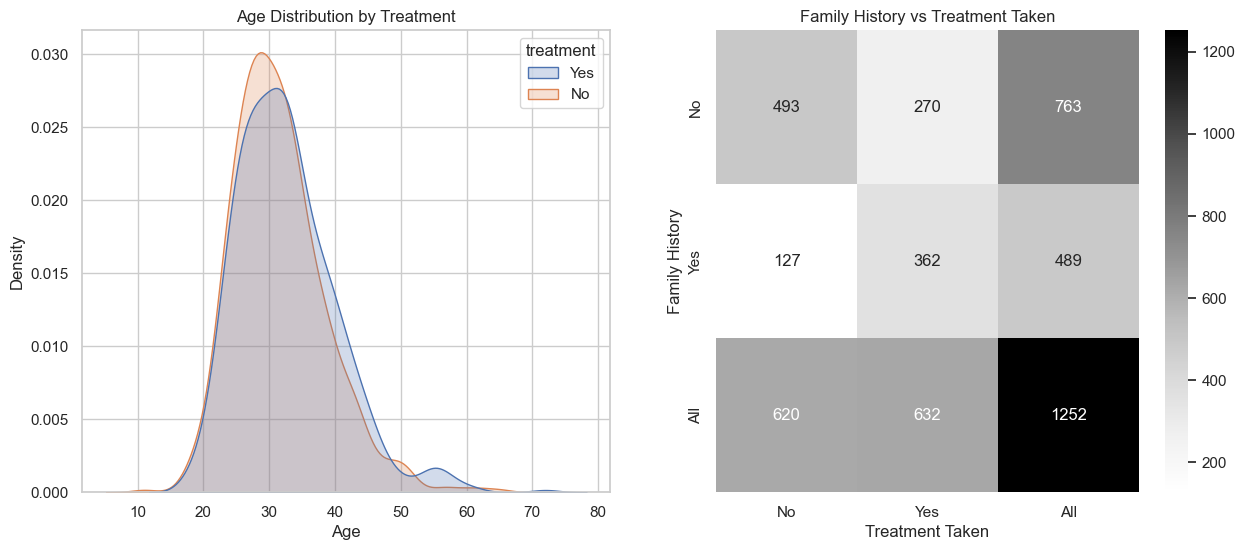

In [37]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.kdeplot(data=clean_df, x="Age", hue="treatment", fill=True)
plt.title("Age Distribution by Treatment")
plt.xlabel("Age")
plt.subplot(1,2,2)
sns.heatmap(pd.crosstab(clean_df["family_history"], clean_df["treatment"], margins=True), annot=True, fmt='d', cmap='Greys')
plt.ylabel("Family History")
plt.xlabel("Treatment Taken")
plt.title("Family History vs Treatment Taken")

## Insights:
* KDE graph follows normal distribution, both with respect to Treatment taken and and not.
* Employees do ignore their mental health and  prevent taking medical treatment.
* Employees over age 50 took treatment are more serious about their mental health.
* Employees with no family history with mental illness are ignorant towards thier own mental health, where employees with mental history knows the consequences of mental illness and they are serious about them and took treatment.

In [38]:
country_crosstb=pd.crosstab(clean_df["Country"], clean_df["treatment"], margins=True)

In [39]:
country_crosstb.loc[:,"All"]

Country
Australia                   21
Austria                      3
Belgium                      6
Bosnia and Herzegovina       1
Brazil                       6
Bulgaria                     4
Canada                      72
China                        1
Colombia                     2
Costa Rica                   1
Croatia                      2
Czech Republic               1
Denmark                      2
Finland                      3
France                      13
Georgia                      1
Germany                     45
Greece                       2
Hungary                      1
India                       10
Ireland                     27
Israel                       5
Italy                        7
Japan                        1
Latvia                       1
Mexico                       3
Moldova                      1
Netherlands                 27
New Zealand                  8
Nigeria                      1
Norway                       1
Philippines                  1


In [40]:
country_crosstb["Treatment_%"]=country_crosstb["Yes"]/country_crosstb["All"]*100

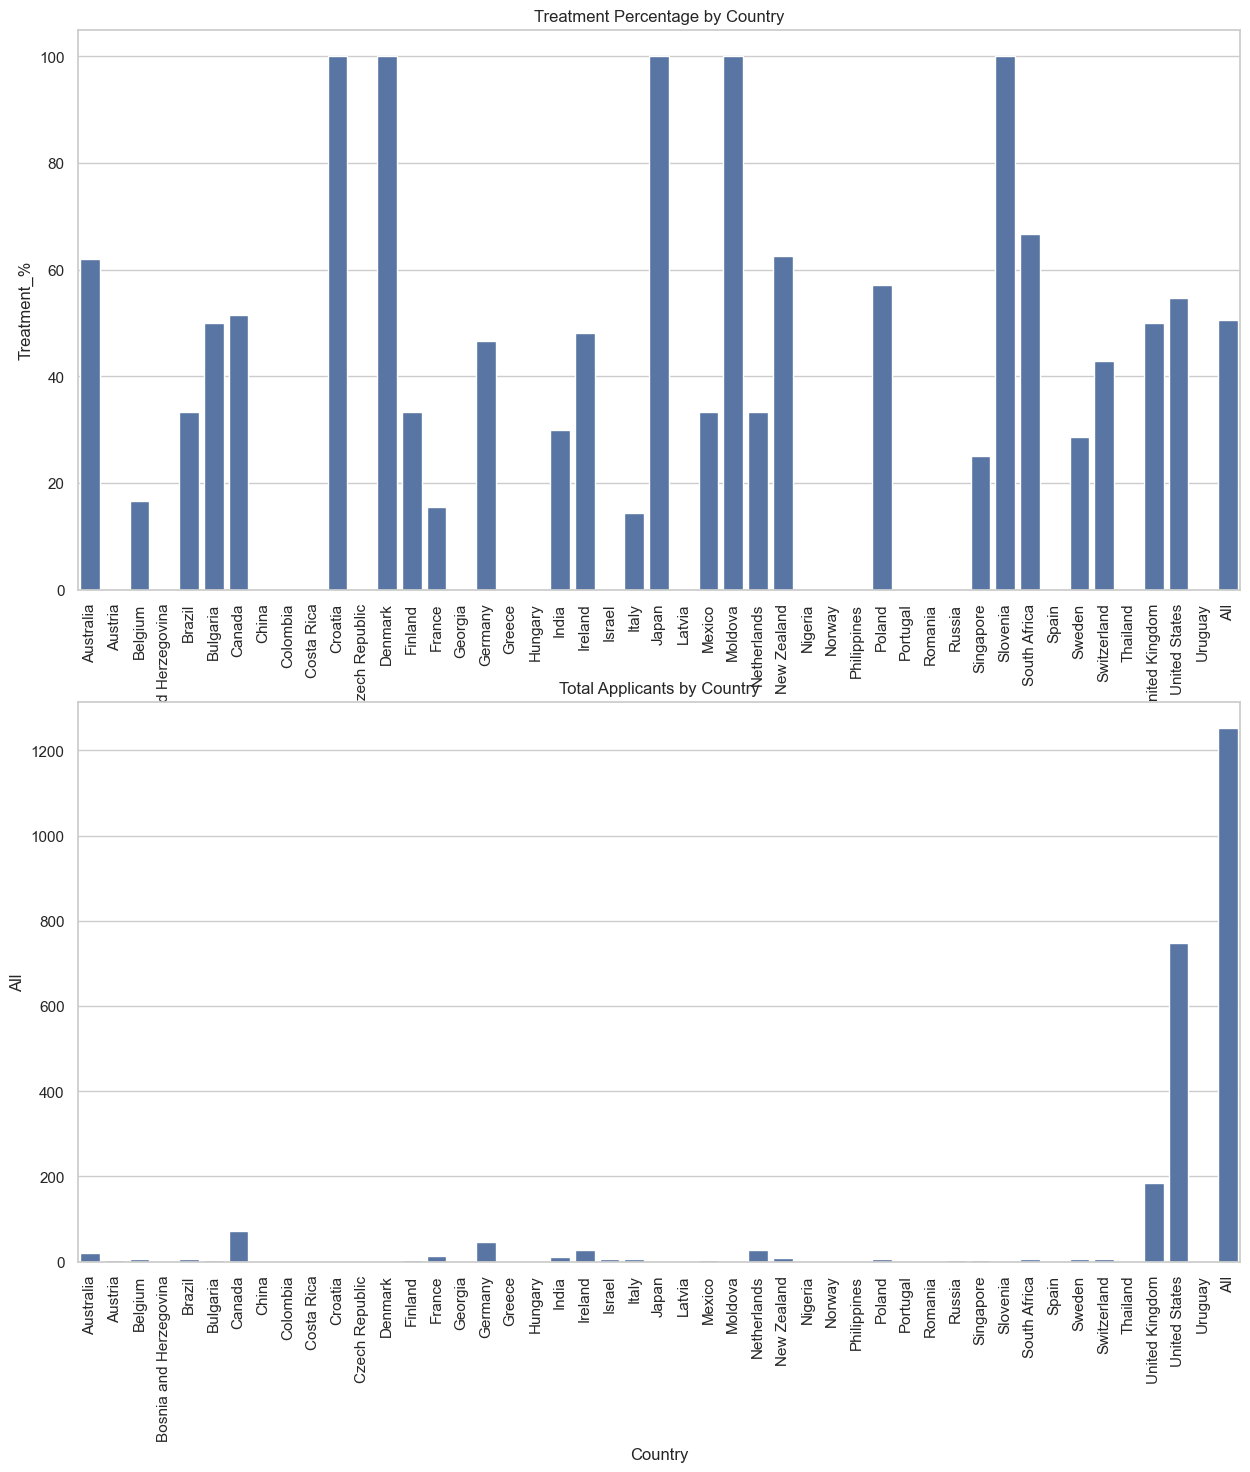

In [41]:
plt.figure(figsize=(15,16))
plt.subplot(2,1,1)
sns.barplot(data=country_crosstb["Treatment_%"].transpose())
plt.xticks(rotation=90)
plt.title("Treatment Percentage by Country")
plt.subplot(2,1,2)
sns.barplot(country_crosstb.loc[:,"All"])
plt.xticks(rotation=90)
plt.title("Total Applicants by Country")
plt.show()

# Insights:
* Many countires have 100 percent treatment taken ratio because of less no. of applicants from those countries.
* United States and United States have highest number of applicants, also has a high ratio of treatment taken.
* Countries with decent number of applicants like Canada, Netherelands have a very low ratio of treatment taken